# Assumption For Linear Regression

1. linearity - relationship between dependent and independent variables
2. Error has zero mean
3. homoscedasticity (constant variance) of the errors )
4. Errors are uncorrelated (time series) ie No Autocorrelation of Errors
5. normality of the error distribution - Errors are normally distributed

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [300]:
df=pd.read_csv("Data.xls")
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [301]:
from sklearn.impute import KNNImputer
knn=KNNImputer()
df.loc[:,['Price','EngineV','Mileage','Year']]=knn.fit_transform(df.loc[:,['Price','EngineV','Mileage','Year']])


In [302]:
df.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [303]:
df.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.490649,0.057060,0.505263
Mileage,-0.490649,1.000000,0.022003,-0.668635
EngineV,0.057060,0.022003,1.000000,-0.023355
Year,0.505263,-0.668635,-0.023355,1.000000


In [304]:
df["new_year"]=df.Year.max()-df.Year
df.drop("Year",axis=1,inplace=True)

In [305]:
df.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,new_year
count,4345,4345.000000,4345,4345.000000,4345.000000,4345,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,312,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,E-Class,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,199,NaN
mean,NaN,20548.317627,NaN,161.237284,2.797385,NaN,NaN,NaN,9.449942
std,NaN,26937.057565,NaN,105.705797,5.010937,NaN,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,NaN,0.000000
25%,NaN,7000.000000,NaN,86.000000,1.900000,NaN,NaN,NaN,4.000000
50%,NaN,11700.000000,NaN,155.000000,2.200000,NaN,NaN,NaN,8.000000
75%,NaN,22700.000000,NaN,230.000000,3.000000,NaN,NaN,NaN,13.000000


In [306]:
df.drop("Model",inplace=True,axis=1)

In [307]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,new_year
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,25.0
1,Mercedes-Benz,7900.0,van,427.0,2.9,Diesel,yes,17.0
2,Mercedes-Benz,13300.0,sedan,358.0,5.0,Gas,yes,13.0
3,Audi,23000.0,crossover,240.0,4.2,Petrol,yes,9.0
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,yes,5.0


In [308]:
final_data1=pd.get_dummies(df,drop_first=True)
final_data1.head()

,Price,Mileage,EngineV,new_year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277.0,2.0,25.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427.0,2.9,17.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358.0,5.0,13.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240.0,4.2,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120.0,2.0,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [309]:
df.describe().columns[:]

Index(['Price', 'Mileage', 'EngineV', 'new_year'], dtype='object')

In [310]:
final_data1[df.describe().columns[1:]].skew()

Mileage      0.808364
EngineV     16.897573
new_year     0.951043
dtype: float64

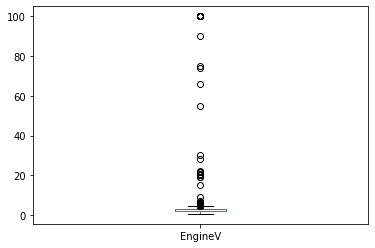

In [311]:
final_data1.EngineV.plot(kind="box")

In [312]:
final_data_1=final_data1[final_data1.EngineV<final_data1.EngineV.quantile(0.96)]
final_data_1.reset_index(drop=True,inplace=True)

In [313]:
final_data_2=final_data_1[final_data_1.Mileage<final_data_1.Mileage.quantile(0.98)]
final_data_2.reset_index(drop=True,inplace=True)

In [314]:
final_data=final_data_2[final_data_2.new_year<final_data_2.new_year.quantile(0.98)]
final_data.reset_index(drop=True,inplace=True)

In [315]:
final_data1.shape
final_data_1.shape
final_data_2.shape
final_data.shape

(3980, 19)

In [316]:
final_data[df.describe().columns[1:]].skew()

Mileage     0.163619
EngineV     1.023817
new_year    0.602947
dtype: float64

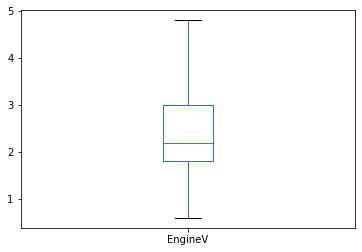

In [317]:
final_data.EngineV.plot(kind="box")

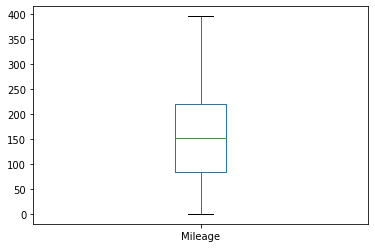

In [318]:
final_data.Mileage.plot(kind='box')

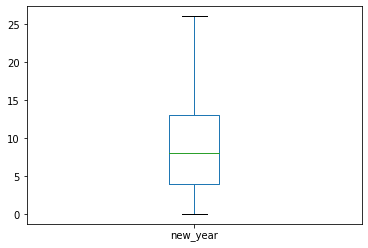

In [319]:
final_data.new_year.plot(kind='box')

In [320]:
final_data.head()

,Price,Mileage,EngineV,new_year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277.0,2.0,25.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,23000.0,240.0,4.2,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,18300.0,120.0,2.0,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,14200.0,200.0,2.7,10.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,10799.0,193.0,1.5,4.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


### 1. Test for Homoscedasticity
* Breusch–Pagan test
* Goldfeld–Quandt test
* White test
### 2. Testing for autocorrelation 
* Durbin-Watson test
* Ljung–Box test
### 3. Testing for normality
* Jarque-Bera test
* shapiro wilk test

## Linearity

Linearity can be checked by plotting each independent variable with the dependent variable.we can use pairplot.

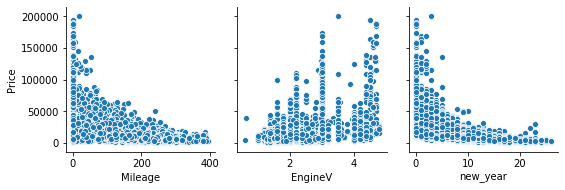

In [321]:
sns.pairplot(final_data,x_vars=df.describe().columns[1:],y_vars='Price')

/Users/deonschellito619/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/deonschellito619/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/deonschellito619/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


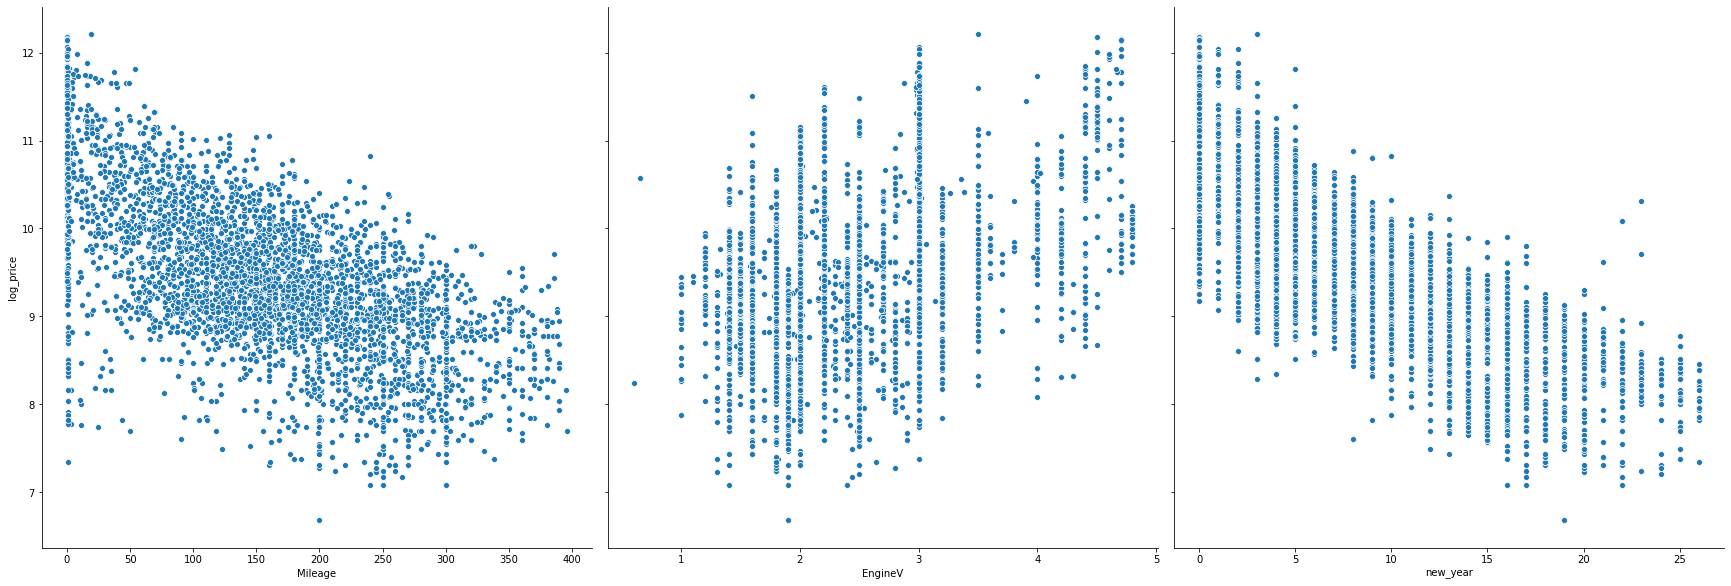

In [322]:
final_data["log_price"]=np.log(final_data["Price"])
final_data.drop("Price",axis=1,inplace=True)
sns.pairplot(final_data,x_vars=df.describe().columns[1:],y_vars='log_price',size=8)

(0, 7)

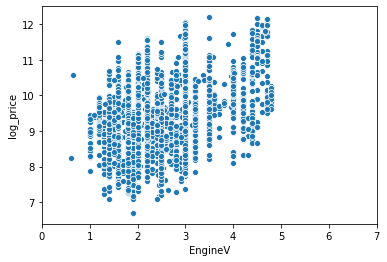

In [323]:
sns.scatterplot(x=final_data["EngineV"],y=final_data.log_price)
plt.xlim([0,7])

In [324]:
import statsmodels.api as sm
x=final_data.drop("log_price",axis=1)
y=final_data.log_price

In [325]:
x1=sm.add_constant(x)
model=sm.OLS(y,x1).fit()

In [326]:
model.rsquared

0.8856392107987782

In [327]:
model.rsquared_adj

0.885119520264665

In [410]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1704.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:38:44   Log-Likelihood:                -918.85
No. Observations:                3980   AIC:                             1876.
Df Residuals:                    3961   BIC:                             1995.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.4143      0.036    262.581      0.000       9.344       9.485
Mileage                -0.0013   8.39e-05    -15.606      0.000      -0.001      -0.001
EngineV                 0.2854      0.008     35.552      0.000       0.270       0.301
new_year               -0.0862      0.001    -63.523      0.000      -0.089      -0.084
Brand_BMW               0.0740      0.019      3.798      0.000       0.036       0.112
Brand_Mercedes-Benz     0.0619      0.019      3.184      0.001       0.024       0.100
Brand_Mitsubishi       -0.4756      0.024    -19.686      0.000      -0.523      -0.428
Brand_Renault          -0.6015      0.023    -26.168      0.000      -0.647      -0.556
Brand_Toyota           -0.2217      0.021    -10.460      0.000      -0.263      -0.180
Brand_Volkswagen       -0.2277      0.019    -11.752      0.000      -0.266      -0.190
Body_hatch             -0.3295      0.025    -13.087      0.000      -0.379      -0.280
Body_other             -0.2134      0.020    -10.550      0.000      -0.253      -0.174
Body_sedan             -0.2507      0.016    -16.025      0.000      -0.281      -0.220
Body_vagon             -0.2811      0.022    -12.765      0.000      -0.324      -0.238
Body_van               -0.3828      0.020    -19.057      0.000      -0.422      -0.343
Engine Type_Gas        -0.1251      0.017     -7.365      0.000      -0.158      -0.092
Engine Type_Other      -0.1238      0.027     -4.521      0.000      -0.177      -0.070
Engine Type_Petrol     -0.1104      0.013     -8.448      0.000      -0.136      -0.085
Registration_yes        0.8506      0.018     46.415      0.000       0.815       0.887
==============================================================================
Omnibus:                      295.947   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1522.027
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                       6.021   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Error has zero mean

In [328]:
model.resid.mean()

3.031768024793473e-14

## homoscedasticity 

(-2, 2)

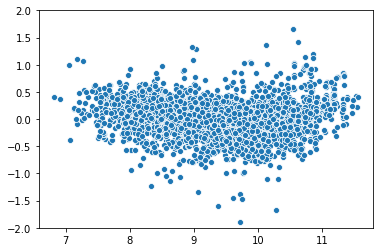

In [329]:
sns.scatterplot(model.predict(x1),model.resid)
plt.ylim([-2,2])

 ### test for heteroscedasticity using the Breusch-Pagan test

- $H_0$ = No heteroscedasticity
- $H_A$ = there is heteroscedasticity

Test decision

if the p-value is less than 5% then reject the $H_0$. which means there is heteroscedasticity

In [330]:
import statsmodels
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']

bp = statsmodels.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)

if bp[1] <0.05:
    print('Reject Null Hypothesis:Error terms are heteroscedastic')
else:
    print('Accept Null Hypothesis:Error terms are homoscedastic')
    
pd.DataFrame(bp,name)

Reject Null Hypothesis:Error terms are heteroscedastic


,0
Lagrange multiplier statistic,2.517193e+02
p-value,3.644951e-43
f-value,1.485731e+01
f p-value,1.036931e-44


### Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

In [331]:
name = ['F statistic', 'p-value']
test = statsmodels.stats.diagnostic.het_goldfeldquandt(model.resid, x1)
pd.DataFrame(lzip(name,test))
if test[1] <0.05:
    print('Reject Null Hypothesis:Error terms are heteroscedastic')
else:
    print('Accept Null Hypothesis:Error terms are homoscedastic')
pd.DataFrame(test[0:2],name)   

Reject Null Hypothesis:Error terms are heteroscedastic


,0
F statistic,1.093326
p-value,0.023851


A bit more specifically, the Breusch-Pagan test (BP) looks at whether squared residuals can be explained by observed regressors 𝑧𝑖, while the Goldfeld-Quandt test (GQ) relies on the split-sample exercise. Hence, it is conceivable that the former test picked up heteroskedasticity from relation to a variable that did not serve as a splitting variable in the latter, which GQ could then not detect.

In [332]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']

wh = statsmodels.stats.diagnostic.het_white(model.resid, model.model.exog)

if wh[1] <0.05:
    print('Reject Null Hypothesis:Error terms are heteroscedastic')
else:
    print('Accept Null Hypothesis:Error terms are homoscedastic')
    
pd.DataFrame(wh,name)

Reject Null Hypothesis:Error terms are heteroscedastic


,0
Lagrange multiplier statistic,6.917820e+02
p-value,3.615744e-72
f-value,5.562791e+00
f p-value,1.652289e-81


## Errors are uncorrelated (time series) ie No Autocorrelation of Errors

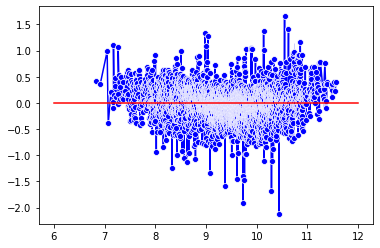

In [407]:
sns.lineplot(model.predict(x1),model.resid,marker='o',color='blue')
sns.lineplot([6,12],[0,0],color='red')

### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
* Null Hypothesis: Autocorrelation is absent.
* Alternative Hypothesis: Autocorrelation is present.

In [335]:
print(min(statsmodels.stats.diagnostic.acorr_ljungbox(model.resid , lags = 40)[1]))
if min(statsmodels.stats.diagnostic.acorr_ljungbox(model.resid , lags = 40)[1]) <0.05:
    print('Reject Null Hypothesis:Autocorrelation is present')
else:
    print('Accept Null Hypothesis:Autocorrelation is Absent')


0.09773159558190679
Accept Null Hypothesis:Autocorrelation is Absent


/Users/deonschellito619/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## Errors are normally distributed

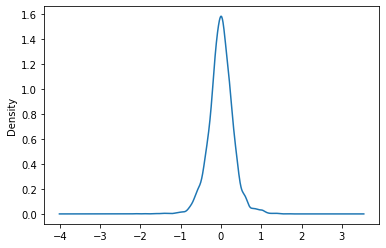

In [336]:
model.resid.plot(kind='kde')

In [421]:
from scipy import stats
jb = stats.jarque_bera(model.resid)
sw = stats.shapiro(model.resid)

print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
print(f'Shapiro-Wilk  ---- statistic: {sw[0]:.4f}, p-value: {sw[1]}')

Jarque-Bera test ---- statistic: 1522.0274, p-value: 0.0
Shapiro-Wilk  ---- statistic: 0.9720, p-value: 3.233863636359607e-27


## No or Little Multicollinearity

In [438]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
columns=['Mileage','EngineV','new_year']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.loc[:,columns].values, i) for i in range(len(columns))]
vif["features"] = columns
vif

,VIF Factor,features
0,7.673044,Mileage
1,2.956648,EngineV
2,7.075144,new_year


In [337]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [338]:
train_sc=reg.score(x_train,y_train)
test_sc=r2_score(y_test,reg.predict(x_test))
print(train_sc,test_sc)

0.8826008812632471 0.8943976087107923


In [339]:
n,p=x.shape
train_Ar2 = 1-(1-train_sc)*(n-1)/(n-p-1)
test_Ar2 = 1-(1-test_sc)*(n-1)/(n-p-1)
print(train_Ar2,test_Ar2)

0.8820673836269781 0.8939177190255598


In [398]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=30)
train_scores=[]
test_scores=[]
for train,test in kf.split(x):
    x_train,x_test,y_train,y_test=x.iloc[train],x.iloc[test],y.iloc[train],y.iloc[test]
    reg_kf=LinearRegression()
    reg_kf.fit(x_train,y_train)
    y_pred=reg_kf.predict(x_test)
    train_scores.append(reg_kf.score(x_train,y_train))
    test_scores.append(r2_score(y_test,y_pred))

In [399]:
print(f'R2 with mean {np.mean(train_scores)} and {np.std(train_scores)}')

R2 with mean 0.8856549698190936 and 0.0007311488828609648


In [400]:
print(f'R2 with mean {np.mean(test_scores)} and {np.std(test_scores)}')

R2 with mean 0.8831101036319555 and 0.020901090394100916
